__________________
Notes and practice from online course: 
[Python for Financial Analysis and Algorithmic Trading](https://www.udemy.com/python-for-finance-and-trading-algorithms/learn/v4/content)

### - Trends, Seasonality, Cyclical,  Stationary, Hodrick-Prescott filter (HP filter); ###
### - Simple moving average (SMA), EWMA (Exponentially-weighted moving average); ###
### - ETS model/decomposition (Error-Trend-Seasonality); ###
### - Stationality test (adfuller: Augmented Dickey-Fuller test); ###
### - AR (AutoRegressive), MA (Moving Average), ACF (Autocorrelation function), PACF (Partial autocorrelation function); ### 
### - AutoRegressive integrated moving averages ARIMA, Seasonal ARIMA ###
(fundametal but not very good for stock data, it is said)
_______________________

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import statsmodels.api as sm    # this model import often gets warning, it is said  

___________
### Load data from statsmodels, fix index ###

In [6]:
df = sm.datasets.macrodata.load_pandas().data     # statsmodel comes with data
print(df.shape)
df.head()

(203, 14)


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [7]:
print(sm.datasets.macrodata.NOTE)   # description of macrodata

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [10]:
df.tail(3)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [11]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))
df.index = index
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


______
### hpfilter to trend and cyclical data ###

In [13]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df.realgdp)
print(type(gdp_cycle), gdp_cycle.shape)
print(type(gdp_trend), gdp_trend.shape)

<class 'pandas.core.series.Series'> (203,)
<class 'pandas.core.series.Series'> (203,)


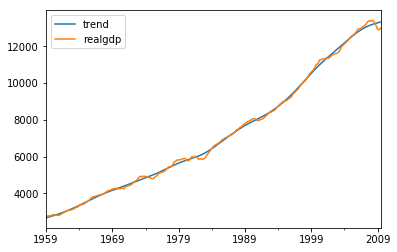

In [15]:
df['trend'] = gdp_trend
df[['trend', 'realgdp']].plot();

__________
### SMA (Simple Moving Average) ###

In [16]:
airline = pd.read_csv('airline_passengers.csv',index_col="Month")
airline.head(3)

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0


In [17]:
print(type(airline.index[0]))

<class 'str'>


In [19]:
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)
airline.head(3)

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0


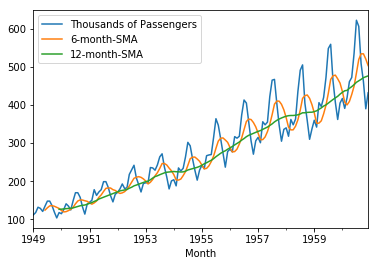

In [20]:
airline['6-month-SMA']=airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA']=airline['Thousands of Passengers'].rolling(window=12).mean()
airline.plot();

______________
### EWMA: Exponentially-weighted moving average ###
* y0 = x0; yi = (1-alpha)*y_(i-1) + alpha*xi.  
* or the weight wi: wi= .... (See slides ). 
* alpha is related to: span, center of mass, half-life

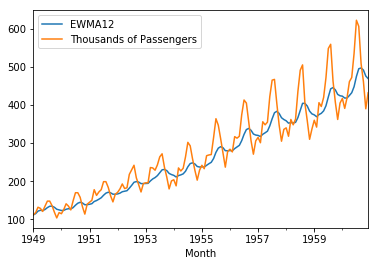

In [21]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline[['EWMA12', 'Thousands of Passengers']].plot();

__________
### ETS decomposition: tsa.seasonal.seasonal_decompose ###

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

<class 'statsmodels.tsa.seasonal.DecomposeResult'>
['__str__', '__le__', '__class__', 'trend', '__ge__', 'observed', '__delattr__', '__gt__', '__new__', '__sizeof__', '__dir__', 'resid', '__getattribute__', '__init__', '__reduce__', '__format__', 'nobs', '__setattr__', '__ne__', 'seasonal', 'plot', '__lt__', '__module__', '__repr__', '__hash__', '__weakref__', '__reduce_ex__', '__subclasshook__', '__dict__', '__eq__', '__doc__']


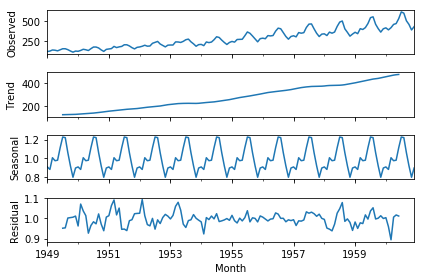

In [26]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='miltiplicative')
# model='additive' is better for linear trend. We assume the trend is not exactly linear for this data
print(type(result))
print(result.__dir__())  # so it has: result.trend, result.seasonal, result.resid
result.plot();   # fig=result.plot() will also avoid the duplicated plot

__________________
### Stationality test (Augmented Dickey-Fuller test) ###

In [27]:
df2 = pd.read_csv("monthly-milk-production-pounds-p.csv")
print(df2.head(3))
df2.tail(3)

     Month  Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0  1962-01                                              589.0       
1  1962-02                                              561.0       
2  1962-03                                              640.0       


,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [29]:
df2.columns = ['Month', 'Milk pounds per cow']
df2.drop(168, axis=0, inplace=True)    # a weird last line, drop it. The way of indexing in drop !!!

In [32]:
df2['Month'] = pd.to_datetime(df2['Month'])
df2.set_index('Month', inplace=True)
print(df2.head(3))
df2.describe().transpose()

            Milk pounds per cow
Month                          
1962-01-01                589.0
1962-02-01                561.0
1962-03-01                640.0


,count,mean,std,min,25%,50%,75%,max
Milk pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


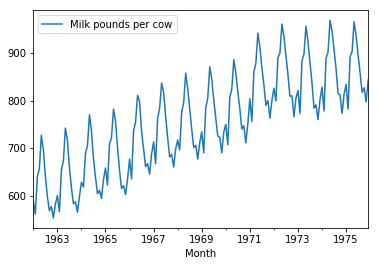

In [34]:
df2.plot();

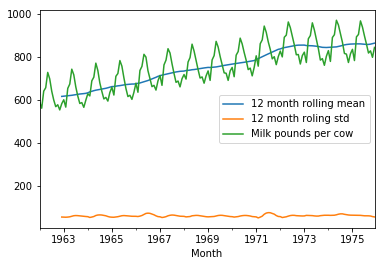

In [36]:
df2['Milk pounds per cow'].rolling(12).mean().plot(label='12 month rolling mean')
df2['Milk pounds per cow'].rolling(12).std().plot(label = '12 month roling std')
df2['Milk pounds per cow'].plot()
plt.legend();

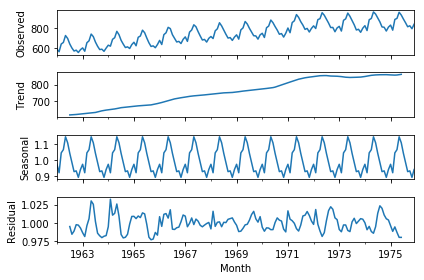

In [42]:
decomp = seasonal_decompose(df2['Milk pounds per cow'], freq=12, model='multiplicative')
# in lecture, model='multiplicative' is not used
# lecture video says, freq=12 is actually not needed for pandas data. (help file explains)
fig = decomp.plot()
fig.set_size_inches(6,4)

In [44]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df2['Milk pounds per cow'])
labels = ['AD test statistic', 'p-value', '#Lags Used',  'Number of observations used']

for value, label in zip(result, labels):
    print(label + ': ' + str(value))

AD test statistic: -1.30381158742
p-value: 0.627426708603
#Lags Used: 13
Number of observations used: 154


In [49]:
print(type(decomp.resid.dropna(axis=0)))
print(decomp.resid.dropna(axis=0).shape)
decomp.resid.dropna(axis=0).head(2)

<class 'pandas.core.series.Series'>
(156,)


Month
1962-07-01    0.995100
1962-08-01    0.984586
Name: Milk pounds per cow, dtype: float64

In [50]:
result = adfuller(decomp.resid.dropna(axis=0))
for value, label in zip(result, labels):
    print(label + ': ' + str(value))

AD test statistic: -7.53412980101
p-value: 3.51489287046e-11
#Lags Used: 8
Number of observations used: 147


** without decomposition, p=0.627 > 0.05, so the original data is not stationary (it's seasonal); after decomposition, p=3.515e-11 < 0.5, reject null hypothesis, it's stationary (not seasonal). **

_______________
### Differencing seasonal data (vs seasonal difference) ###
pandas.plotting has autocorrelation_plot, but no pacf_plot

In [64]:
df2['first difference'] = df2['Milk pounds per cow'] - df2['Milk pounds per cow'].shift(1)
result = adfuller(df2['first difference'].dropna())
for value, label in zip(result, labels):
    print(label + ': ' + str(value))

AD test statistic: -3.05499555865
p-value: 0.0300680040018
#Lags Used: 14
Number of observations used: 152


In [53]:
df2['second difference'] = df2['first difference'] - df2['first difference'].shift(1)
result = adfuller(df2['second difference'].dropna())
for value, label in zip(result, labels):
    print(label + ': ' + str(value))

AD test statistic: -14.3278736456
p-value: 1.11269893321e-26
#Lags Used: 11
Number of observations used: 154


In [61]:
df2['seasonal difference'] = df2['first difference'] = df2['Milk pounds per cow'] - df2['Milk pounds per cow'].shift(12)
result = adfuller(df2['seasonal difference'].dropna())
for value, label in zip(result, labels):
    print(label + ': ' + str(value))

AD test statistic: -2.33541931436
p-value: 0.160798805277
#Lags Used: 12
Number of observations used: 143


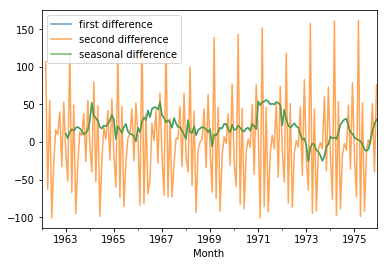

In [62]:
df2[['first difference', 'second difference', 'seasonal difference']].plot(alpha=0.7);

- ** Surprise!! Even there are obvious periodic pattern in normal difference data, both 'first difference' and 'second difference' are adfuller stationary. The seasonal difference with 12 month shift has no obvious periodic pattern with smaller peak-valley, but is not stationary, with p-value>0.05. ** 
- ** Stationary may include seasonality ? **

AD test statistic: -5.03800227492
p-value: 1.86542343188e-05
#Lags Used: 11
Number of observations used: 143


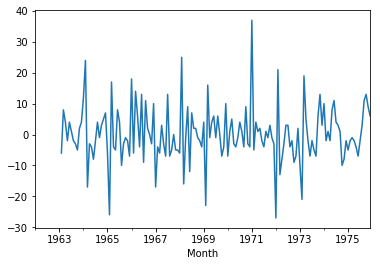

In [65]:
df2['seasonal 1st difference'] = df2['first difference'] - df2['first difference'].shift(12)
result = adfuller(df2['seasonal 1st difference'].dropna())
for value, label in zip(result, labels):
    print(label + ': ' + str(value))
df2['seasonal 1st difference'].plot()

** Combining both normal difference and seasonal difference is probable a good way of obtaining both stationary and smaller peak-valley values **

______________
### Autocorrelation and partial autocorrelation plots ###
* autocorrelation: the correlation to itself with lag of x
* partial autocorrelation: removing the correlation contributions from lags in between 

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

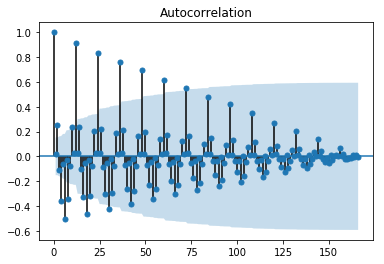

In [68]:
fig_first = plot_acf(df2["first difference"].dropna())  # assigne the plot to avoid duplicates

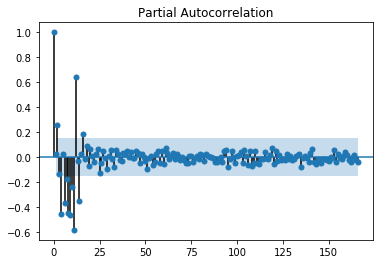

In [76]:
partial_first = plot_pacf(df2["first difference"].dropna(), method='ywmle')
# will have warning, actually error, if use default method !!!!! 
# In lecture, it limits lags=40 with default method

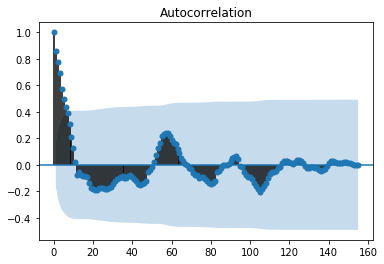

In [71]:
fig_seasonal = plot_acf(df2['seasonal difference'].dropna())

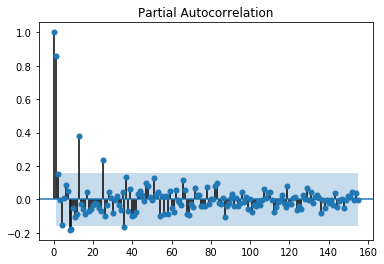

In [77]:
partial_seasonal = plot_pacf(df2["seasonal difference"].dropna(),  method='ywmle')

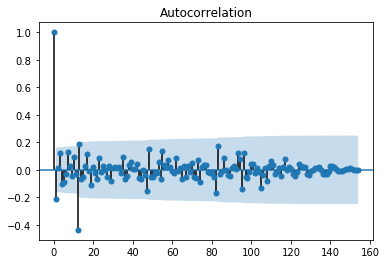

In [72]:
fig_first_seasonal = plot_acf(df2['seasonal 1st difference'].dropna())

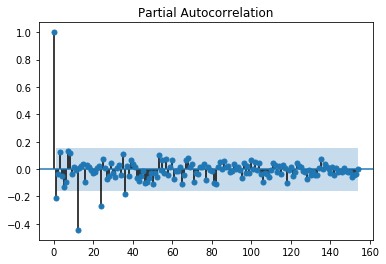

In [78]:
partial_seasonal_1st_diff = plot_pacf(df2["seasonal 1st difference"].dropna(), method='ywmle')

<class 'pandas.core.series.Series'>


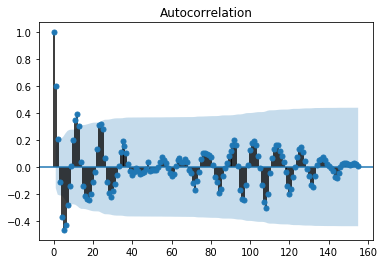

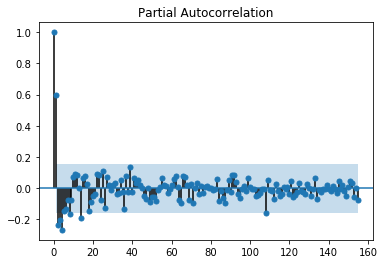

In [98]:
#decomp.resid.plot()
print(type(decomp.resid))
fig_resid = plot_acf(decomp.resid.dropna()) #, lags=40)
plot_pacf(decomp.resid.dropna(), method='ywmle');

### My impression: ###
- ** even the adfuller algorithm says that the differenced data is stationary, but the ACF and PACF tells us that the results are still seasonal; **
- ** With data after both seasonal difference and normal difference, the ACF and PACF results are better; **
- ** the ACF and PACF tests of the residual of statsmodel seasonal decomposition are also not bad **

______________
### Seasonal ARIMA (and ARIMA), and its forecasting ###
- ** It is said that: in most cases either p or q is zero, and p+q is less than or equal to 3.**
- ** It is said hard to interpret **

In [99]:
model = sm.tsa.statespace.SARIMAX(df2['Milk pounds per cow'], order=(0,1,0), seasonal_order=(1,1,1,12))
# 12 in seasonal_order is for seasonal period. 
# The selection of these order numbers in principle by observing plot_acf, and plot_pacf
results = model.fit()
print(results.summary())   # not sure what is the meaning of there numbers !!!!!

C:\Users\huang\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                Milk pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Wed, 12 Sep 2018   AIC                           1074.131
Time:                                    15:33:51   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

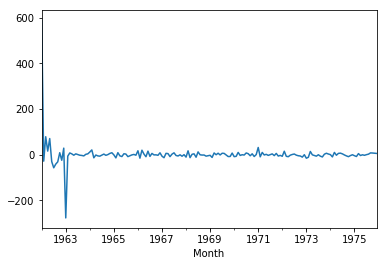

In [101]:
results.resid.plot();

In [106]:
df2.shape

(168, 6)

In [107]:
from pandas.tseries.offsets import DateOffset

In [108]:
future_dates = [df2.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

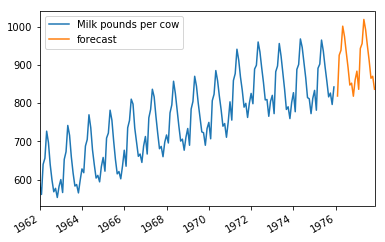

In [111]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns = df2.columns)
future_df2 = pd.concat([df2, future_dates_df])
future_df2['forecast'] = results.predict(start = 168, end=190, dynamic=True)
future_df2[['Milk pounds per cow', 'forecast']].plot()